# Digit Recognition using MNIST


In this notebook we create our own digit recogniser. With the combined powers of the [MNIST]() dataset and [Keras]() we can build our own programme that classifies and returns a given image of a digit. 

The script created will perform the following actions:
1. Prepare the MNIST dataset
2. Build/train & test a neural network model using the prepared data. 
3. Pass input of an image to the model.
4. Get the result --> a classification of our image

## Preparing the data
You can download and unzip the raw data in the MNIST data set from [here](). I've demonstrated in a previous [script]() and [notebook]() how to process the binary images. Keras, however, provides an import for the data set, so lets be nice to ourselves and use it. 

In [65]:
# Import keras.
import keras as kr
from keras.datasets import mnist # No need to re-invent the wheel...

With our dataset imported we can now split it into our train and test sets. Keras can even handle this for us too! Yay.

In [66]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

It's always a good idea to inspect a few samples in your dataset, just to make sure everything loaded correctly. For this, we can use matplot lib to give us a picture of some sample images. 

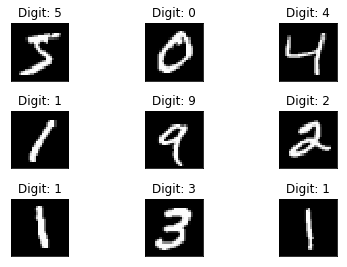

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

 ###### Looks good to me!


We're nearly good to go. However, if we take closer look at our data we can identify an important trend. The pixel value range from 0 to 255. As our images are black and white, most of the values are either very close 255 (white) or at the other end of the spectrum near white(255). We can use matplot to confirm this.

Text(0.5, 1.0, 'Pixel Value Distribution')

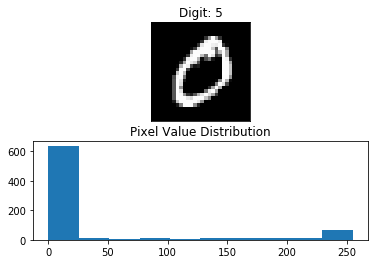

In [68]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[1], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

Given this distribution of our data, it makes sense to normalize it. The benefits of normalization include speeding up the training process and also prevents you from getting stuck in local optima.

Now, in order to train our neural network to classify images, we first have to unroll the height x width pixel format into one big single dimensional array. Given that our images are 28 x 28, some quick maths tells us that we should create an array of size 784.

In [69]:
# building the input vector from the 28x28 pixels
# in each dataset we use numpy to invert the values - so that the background is white and didgit is black
X_train = ~np.array(list(X_train)).reshape(60000, 784).astype(np.uint8) 
X_test = ~np.array(list(X_test)).reshape(10000, 784).astype(np.uint8) 

# Normalize! 
X_train = X_train /255
Y_train = Y_train/ 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


The final step in our dataset prep, is one hot encoding. Rather than labeling things as a number starting from 1 and then increasing for each category, we’ll go for more of a binary style of categorization. This binary style is known as [one-hot encoding](). 

To represent each category of number,we create an array set to all zeros except for the position of the label we want to represent. Have a look at my sketch image below to clear things up. Thus a '5' will be represented by [0,0,0,0,1,0,0,0,0].

In [91]:
from keras.utils import np_utils

# one-hot encoding using keras' numpy-related utilities
n_classes = 10 # --> classes are the digits 0-9
print("Shape before one-hot encoding: ", y_train.shape) # before
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)# after

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Building the Neural Network
To create our neural network we first import Keras and initialise our model. 

In [92]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()


We then add our first layer. When adding the first layer in the Sequential Model we need to specify the input shape so Keras can create the appropriate matrices.

This contains 600 neurons and features an input layer of size 784. It's no co incidence taht we set our input layer to ( 28 x 28). It corresponds nicely to the data we shaped earlier.  

In [93]:
# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))


We then stack another layer, this time one of 400 neurons. 

In [94]:
model.add(kr.layers.Dense(units=400, activation='relu'))


And finally, we construct our ouput layer. This layer contains ten neurons, each to represent one of our possible outputs, i.e a number between 0-9. 

In [95]:
# Add a ten neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))


Now we can build the model. I switched from the adam optimizer over . n). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other [loss functions](https://keras.io/losses/) are available. 

In [96]:
# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size). Generally the bigger the batch, the more stable our stochastic gradient descent updates will be. 

In [97]:
 model.fit(X_train, Y_train,
          batch_size=120, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.5691 - acc: 0.8294 - val_loss: 1.6211 - val_acc: 0.8979
Epoch 2/20
 - 6s - loss: 0.2502 - acc: 0.9224 - val_loss: 0.9433 - val_acc: 0.9404
Epoch 3/20
 - 6s - loss: 0.1763 - acc: 0.9448 - val_loss: 0.7157 - val_acc: 0.9552
Epoch 4/20
 - 6s - loss: 0.1452 - acc: 0.9549 - val_loss: 0.6252 - val_acc: 0.9606
Epoch 5/20
 - 6s - loss: 0.1414 - acc: 0.9565 - val_loss: 0.6843 - val_acc: 0.9569
Epoch 6/20
 - 7s - loss: 0.1281 - acc: 0.9598 - val_loss: 0.5794 - val_acc: 0.9637
Epoch 7/20
 - 7s - loss: 0.1126 - acc: 0.9654 - val_loss: 0.5401 - val_acc: 0.9663
Epoch 8/20
 - 6s - loss: 0.1147 - acc: 0.9643 - val_loss: 0.5323 - val_acc: 0.9665
Epoch 9/20
 - 6s - loss: 0.1081 - acc: 0.9663 - val_loss: 0.7565 - val_acc: 0.9525
Epoch 10/20
 - 7s - loss: 0.1090 - acc: 0.9665 - val_loss: 0.6765 - val_acc: 0.9573
Epoch 11/20
 - 6s - loss: 0.1034 - acc: 0.9684 - val_loss: 0.6769 - val_acc: 0.9575
Epoch 12/20
 - 6s - loss: 0.0988 - 

Our model has been trained, and accuracy levels are looking good at roughly 97%. We can now confirm this by feeding the model our sample test data and evaluating the accuracy. 

In [77]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - 1s 76us/step
Test loss: 1.4850268332208507
Test accuracy: 0.9066


Let's ask our model to predict the digit given an image from our test set. 

In [82]:
model.predict(X_test[10:11])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The hot encoding above shows a prediciton of 0. Let's plot this image and double check.

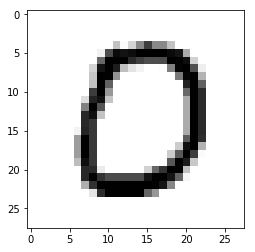

In [84]:
plt.imshow((X_test[10]).reshape(28, 28), cmap='gray')


### Wohoo!
<img src="https://media.giphy.com/media/3o7abldj0b3rxrZUxW/giphy.gif"/>

Resources: 
- https://www.quora.com/When-should-you-perform-feature-scaling-and-mean-normalization-on-the-given-data-What-are-the-advantages-of-these-techniques
- https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
- https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning
- https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
- https://medium.com/@cafielo/build-a-handwritten-digit-recognition-model-with-keras-b8733274574c